## Project Title:  OLA - Ensemble Learning


# Problem Statement


- Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola.
- Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.


- As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.
- Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.


- You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition.
- You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)

- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)



### Column Profiling:


- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates -cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


### Concepts Tested:

        Ensemble Learning- Bagging
        Ensemble Learning- Boosting
        KNN Imputation of Missing Values
        Working with an imbalanced dataset
        


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

import time

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 39.0MB/s]


In [3]:
data = pd.read_csv("ola_driver_scaler.csv")

In [4]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
data.tail()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


In [6]:
data.shape

(19104, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [9]:
#Removing the unwanted column Unnamed: 0
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [10]:
data.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

**Converting features to respective data-types**

In [11]:
data["MMM-YY"] = pd.to_datetime(data["MMM-YY"])
data["Dateofjoining"] = pd.to_datetime(data["Dateofjoining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

**Check for missing values and Prepare data for KNN Imputation**

In [13]:
data.isnull().sum() / len(data) * 100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64



*   There are missing values found in AGE, Gender

*   LastWorkingDate feature contains missing values which indicates the driver has not left the company yet.




In [14]:
num_vars = data.select_dtypes(np.number)

In [15]:
num_vars.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [16]:
num_vars.drop(["Driver_ID"], axis = 1, inplace = True)

**KNN Imputation**

In [17]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_vars)
data_new = imputer.transform(num_vars)
data_new = pd.DataFrame(data_new)

In [18]:
data_new = pd.DataFrame(data_new)

In [19]:
data_new.columns = num_vars.columns

In [20]:
data_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64



*   We have successfully imputed the missing values using KNNImputer


In [21]:
data_new.nunique()

Age                        70
Gender                      6
Education_Level             3
Income                   2383
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

****Concatenating dataframes****

In [22]:
resultant_columns = list(set(data.columns).difference(set(num_vars)))

resultant_columns

['Driver_ID', 'MMM-YY', 'LastWorkingDate', 'City', 'Dateofjoining']

In [23]:
new_df = pd.concat([data_new, data[resultant_columns]], axis=1)

new_df.shape

(19104, 13)

In [24]:
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_ID,MMM-YY,LastWorkingDate,City,Dateofjoining
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,2019-01-01,NaT,C23,2018-12-24
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,2019-02-01,NaT,C23,2018-12-24
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,2019-03-01,2019-03-11,C23,2018-12-24
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,2020-11-01,NaT,C7,2020-11-06
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,2020-12-01,NaT,C7,2020-11-06


#Data Preprocessing

###Feature Engineering

In [25]:
agg_functions = {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
}

In [26]:
processed_df = new_df.groupby(["Driver_ID", "MMM-YY"]).aggregate(agg_functions).sort_index(ascending = [True, True])

processed_df.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1         2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2         2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                           
1         2019-01-01               2.0             NaT  C23    2018-12-24  
          2019-02-01               2.0             NaT  C23    2018-12-24  
          2019-03-01               2.0      2019-03-11  C23    2018-12-24  
2         2020-11-01               1.0             NaT   C7    2020-11-06  
          2020-12-01               1.0             NaT   C7    2020-11-06

In [27]:
final_data = pd.DataFrame()

In [28]:
final_data["Driver_ID"] = new_df["Driver_ID"].unique()

In [29]:
final_data['Age'] = list(processed_df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
final_data['Gender'] = list(processed_df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
final_data['City'] = list(processed_df.groupby('Driver_ID').agg({'City':'last'})['City'])
final_data['Education'] = list(processed_df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
final_data['Income'] = list(processed_df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
final_data['Joining_Designation'] = list(processed_df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
final_data['Grade'] = list(processed_df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
final_data['Total_Business_Value'] = list(processed_df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
final_data['Last_Quarterly_Rating'] = list(processed_df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [30]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


In [31]:
final_data.shape

(2381, 10)

#Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [32]:
first_quarter = processed_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})

last_quarter = processed_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

qr = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()

empid = qr[qr["Quarterly Rating"] == True]["Driver_ID"]

qrl = []
for i in final_data["Driver_ID"]:
    if i in empid.values:
        qrl.append(1)
    else:
        qrl.append(0)


final_data["Quarterly_Rating_Increased"] = qrl

In [33]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1


# Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [34]:
lwd = (processed_df.groupby(["Driver_ID"]).agg({"LastWorkingDate": "last"})["LastWorkingDate"].isna()).reset_index()

lwrid = lwd[lwd["LastWorkingDate"] == True]["Driver_ID"]
target = []

for i in final_data["Driver_ID"]:
    if i in lwrid.values:
        target.append(0)
    else:
        target.append(1)

final_data["target"] = target

In [35]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0


##Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [36]:
mrf = processed_df.groupby(["Driver_ID"]).agg({"Income": "first"})

mrl = processed_df.groupby(["Driver_ID"]).agg({"Income": "last"})

mr = (mrl["Income"] > mrf["Income"]).reset_index()

empid = mr[mr["Income"] == True]["Driver_ID"]
income = []
for i in final_data["Driver_ID"]:
    if i in empid.values:
        income.append(1)
    else:
        income.append(0)

final_data["Salary_Increased"] = income

In [37]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,target,Salary_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


In [38]:
final_data["Salary_Increased"].value_counts(normalize=True)

0    0.98194
1    0.01806
Name: Salary_Increased, dtype: float64



*   Around 1.8% drivers income have been increased.



# Statistical Summary

In [39]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377018e+01,5.933265e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.105838e-01,4.914963e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


* There are total of 2381 different drivers data.
* Age of drivers range from 21years to 58years.
* 75% drivers monthly income is <= 75986.
* 75% drivers acquired 4173650 as total business values.

In [40]:
final_data.describe(include = 'object')

,City
count,2381
unique,29
top,C20
freq,152


* Majority of drivers are coming from C20 city

In [41]:
final_data["Gender"].value_counts()

0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: Gender, dtype: int64

* Majority of drivers are male

In [42]:
final_data["Education"].value_counts()

2.0    802
1.0    795
0.0    784
Name: Education, dtype: int64

* Majority of drivers have completed their graduation.

In [43]:
final_data["target"].value_counts()

1    1616
0     765
Name: target, dtype: int64

* Out of 2381 drivers 1616 have left the company.

In [44]:
n = ['Gender','Education','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased']

for i in n:
    print("------------------------------------------------------------")
    print(final_data[i].value_counts(normalize=True) * 100)

------------------------------------------------------------
0.0    58.798824
1.0    40.949181
0.6     0.125997
0.2     0.083998
0.4     0.041999
Name: Gender, dtype: float64
------------------------------------------------------------
2.0    33.683326
1.0    33.389332
0.0    32.927341
Name: Education, dtype: float64
------------------------------------------------------------
1.0    43.091138
2.0    34.229315
3.0    20.705586
4.0     1.511970
5.0     0.461991
Name: Joining_Designation, dtype: float64
------------------------------------------------------------
2.0    35.909282
1.0    31.121378
3.0    26.165477
4.0     5.795884
5.0     1.007980
Name: Grade, dtype: float64
------------------------------------------------------------
1.0    73.246535
2.0    15.203696
3.0     7.055859
4.0     4.493910
Name: Last_Quarterly_Rating, dtype: float64
------------------------------------------------------------
0    84.964301
1    15.035699
Name: Quarterly_Rating_Increased, dtype: float64


* 58% of drivers are male while female constitutes around 40%
* 33% of drivers have completed graduation and 12+ education
* 43% of drivers have 1 as joining_designation
* Around 36% of drivers graded as 2
* Around 73% of drivers rated as 1 on last quarter
* Only 15% of drivers rating has been increased on quarterly

# Univariate Analysis

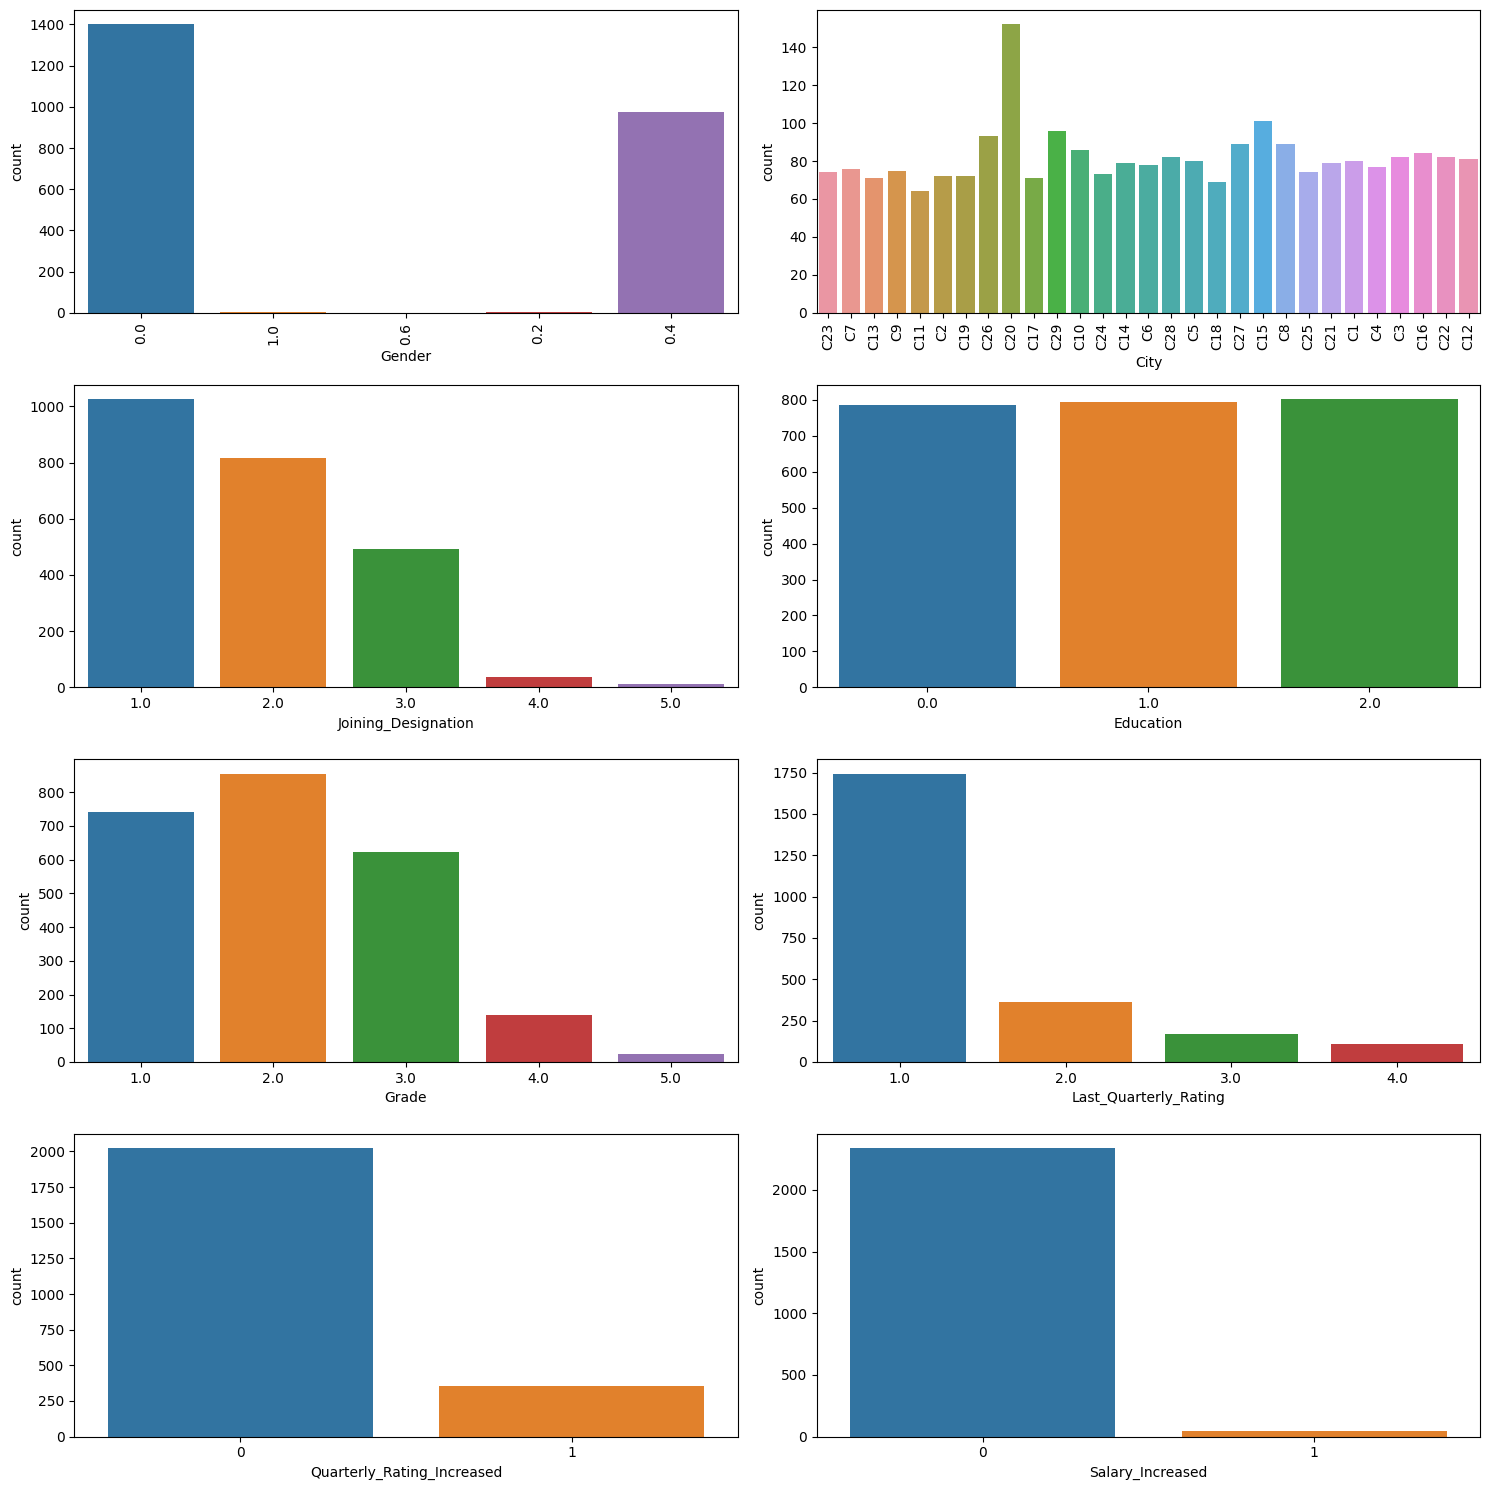

In [50]:
plt.figure(figsize=(15, 15))
plt.subplot(421)
sns.countplot(data=final_data, x="Gender")
final_data["Gender"].value_counts(normalize=True).plot.bar('Gender')

plt.subplot(422)
sns.countplot(data=final_data, x="City")
plt.xticks(rotation="vertical")

plt.subplot(423)
sns.countplot(data=final_data, x="Joining_Designation")

plt.subplot(424)
sns.countplot(data=final_data, x="Education")

plt.subplot(425)
sns.countplot(data=final_data, x="Grade")

plt.subplot(426)
sns.countplot(data=final_data, x="Last_Quarterly_Rating")

plt.subplot(427)
sns.countplot(data=final_data, x="Quarterly_Rating_Increased")

plt.subplot(428)
sns.countplot(data=final_data, x="Salary_Increased")

plt.tight_layout()

**Insights**

* Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.
* Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
* Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.
* Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.
* Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees.

<ipython-input-53-4fc524908f23>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


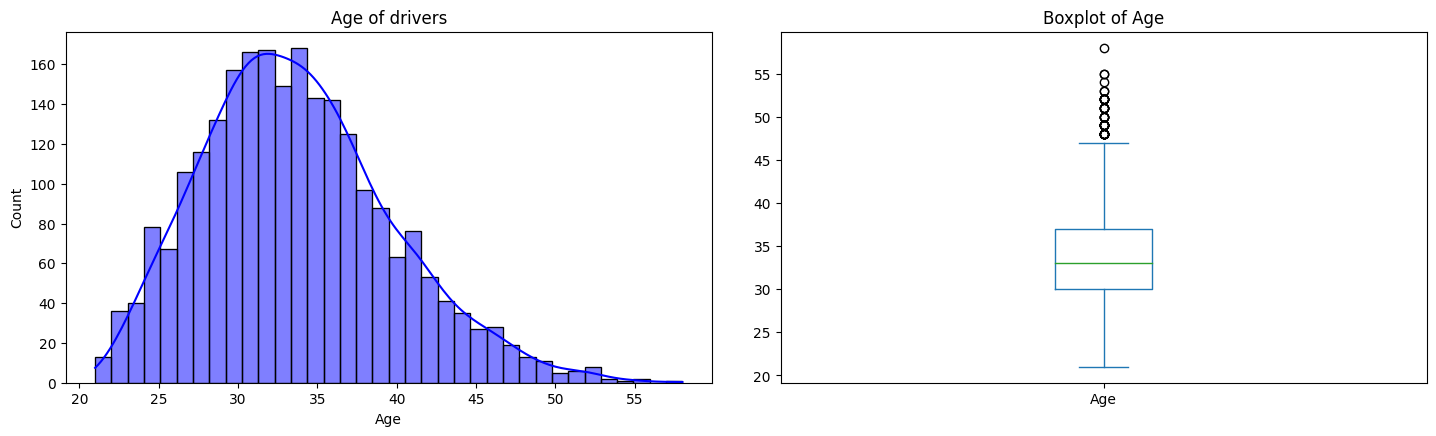

In [53]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Age'],color='blue', kde=True)
plt.title("Age of drivers")
plt.subplot(122)
final_data['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

* The age distribution of the drivers is left-skewed. This means that there are more younger drivers than older drivers. The median age is around 30 years old.
* There is a wide range of ages in the dataset, from 20 to 55 years old.
* There are a few outliers in the data, which are drivers who are either much younger or much older than the majority of the drivers.

<ipython-input-54-d03d03c44901>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


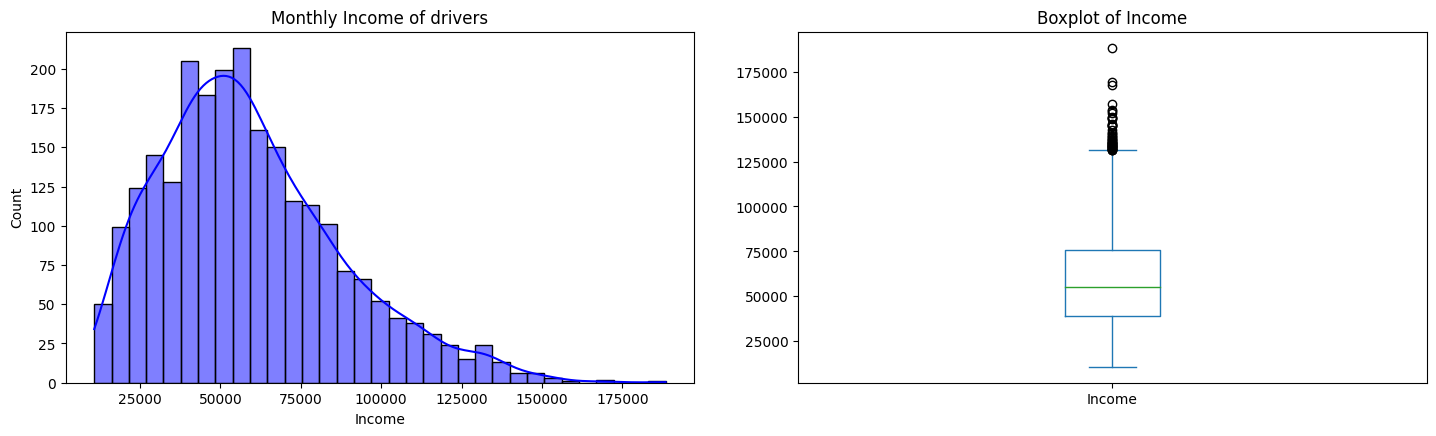

In [54]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Income'],color='blue', kde=True)
plt.title("Monthly Income of drivers")
plt.subplot(122)
final_data['Income'].plot.box(title='Boxplot of Income')
plt.tight_layout(pad=3)

**Insights**
* The distribution of monthly income skewed on right which might indicate the outliers in the data

<ipython-input-56-3e451b7206ea>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


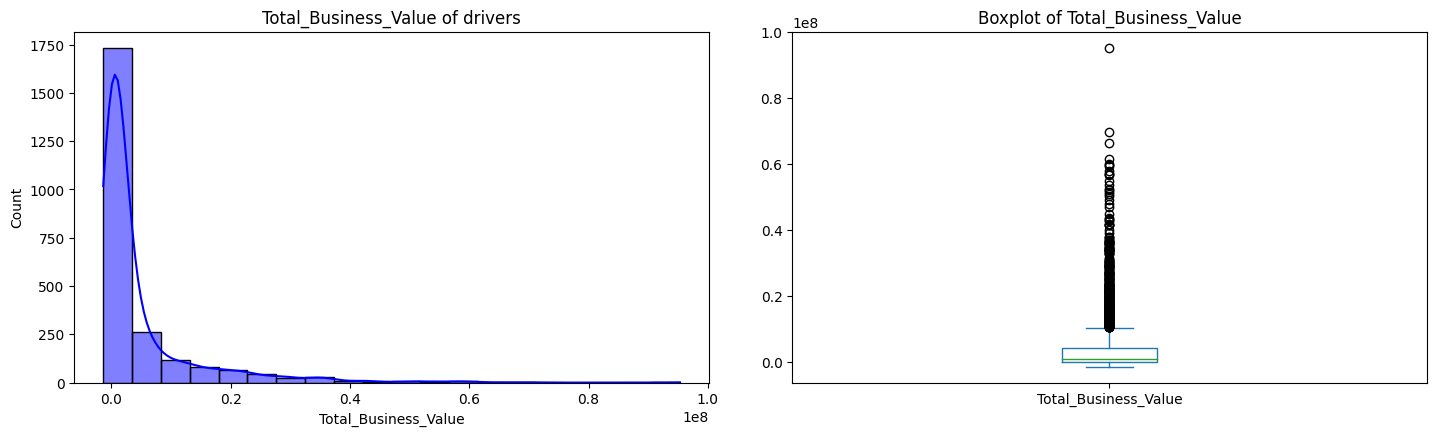

In [56]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Total_Business_Value'],color='blue', kde=True, bins=20)
plt.title("Total_Business_Value of drivers")
plt.subplot(122)
final_data['Total_Business_Value'].plot.box(title='Boxplot of Total_Business_Value')
plt.tight_layout(pad=3)

**Insights**
* The distribution of total business value highly skewed on right which might indicate the outliers in the data

# Bi-Variate Analysis

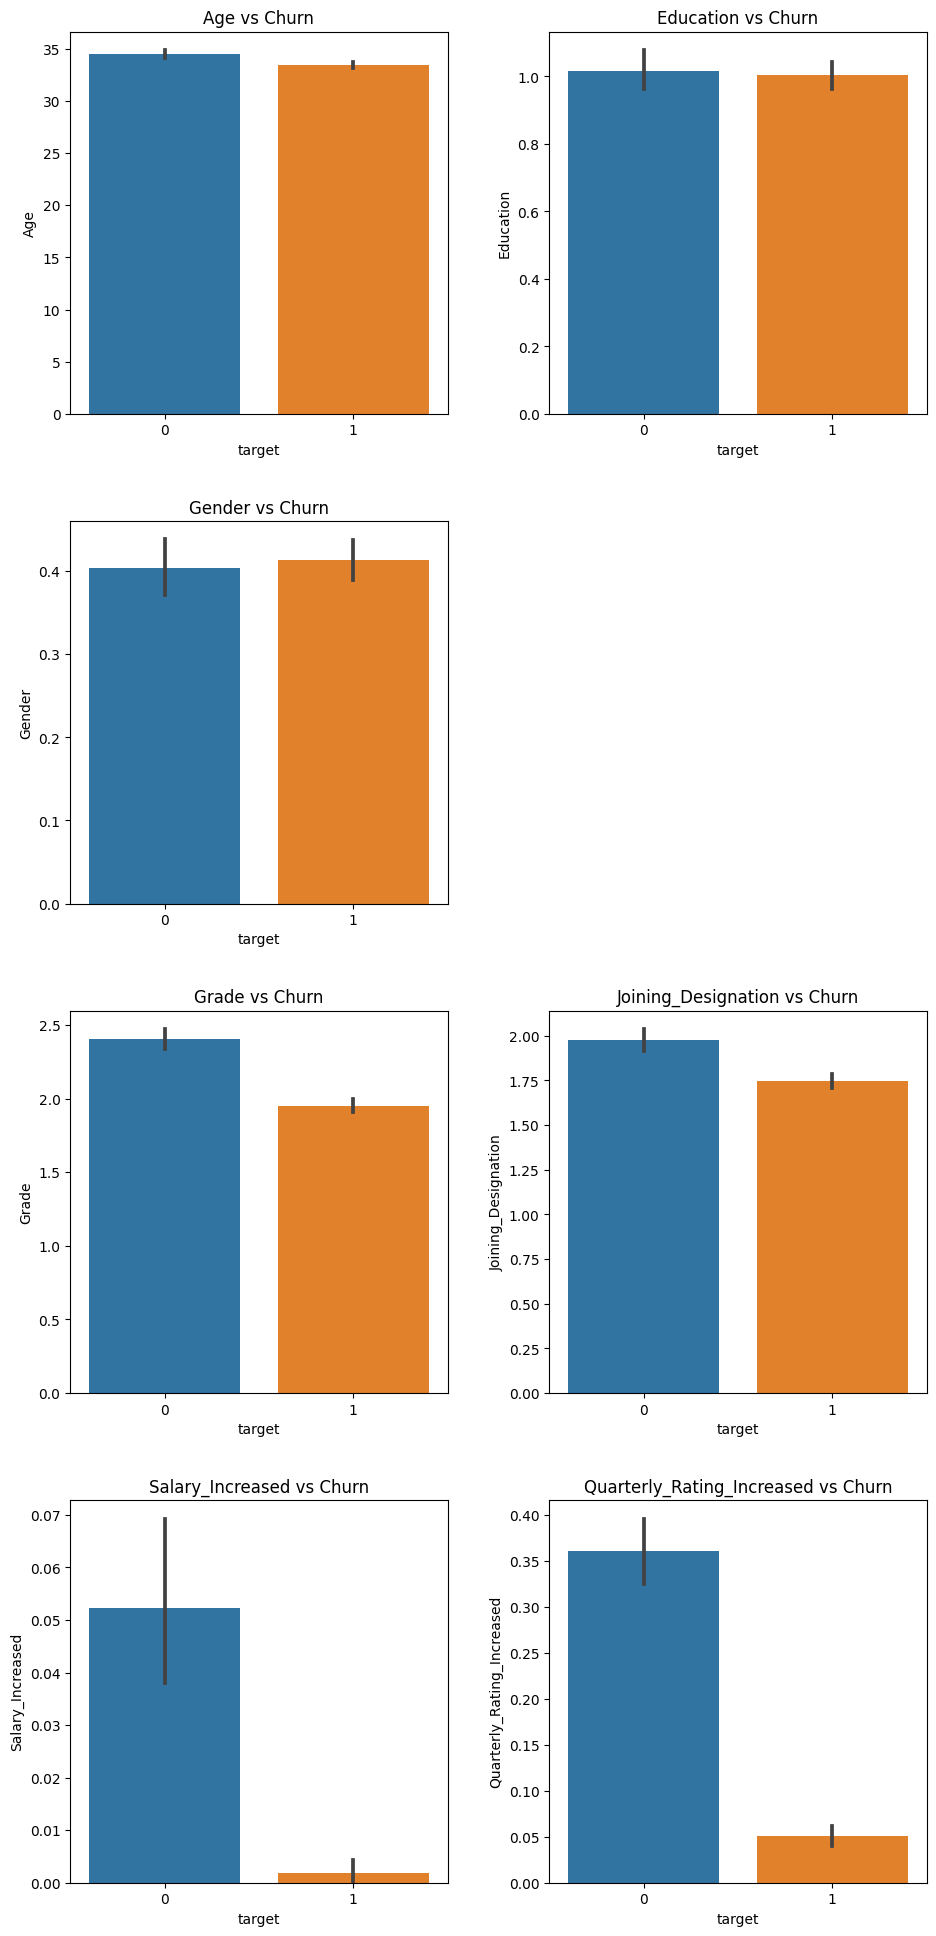

In [57]:
plt.figure(figsize=(10,20))

plt.subplot(421)
sns.barplot(data=final_data, x="target", y="Age")
plt.title("Age vs Churn")

plt.subplot(422)
sns.barplot(data=final_data, x="target", y="Education")
plt.title("Education vs Churn")

plt.subplot(423)
sns.barplot(data=final_data, x="target", y="Gender")
plt.title("Gender vs Churn")

plt.subplot(425)
sns.barplot(data=final_data, x="target", y="Grade")
plt.title("Grade vs Churn")

plt.subplot(426)
sns.barplot(data=final_data, x="target", y="Joining_Designation")
plt.title("Joining_Designation vs Churn")

plt.subplot(427)
sns.barplot(data=final_data, x="target", y="Salary_Increased")
plt.title("Salary_Increased vs Churn")

plt.subplot(428)
sns.barplot(data=final_data, x="target", y="Quarterly_Rating_Increased")
plt.title("Quarterly_Rating_Increased vs Churn")

plt.tight_layout(pad=3)

* The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.
* The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
* The employees whose quarterly rating has increased are less likely to leave the organization.
* The employees whose monthly salary has not increased are more likely to leave the organization.

# Correlation Analysis

<ipython-input-59-f757e79aa42f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_data.corr(method="pearson"), annot=True, cmap="viridis")


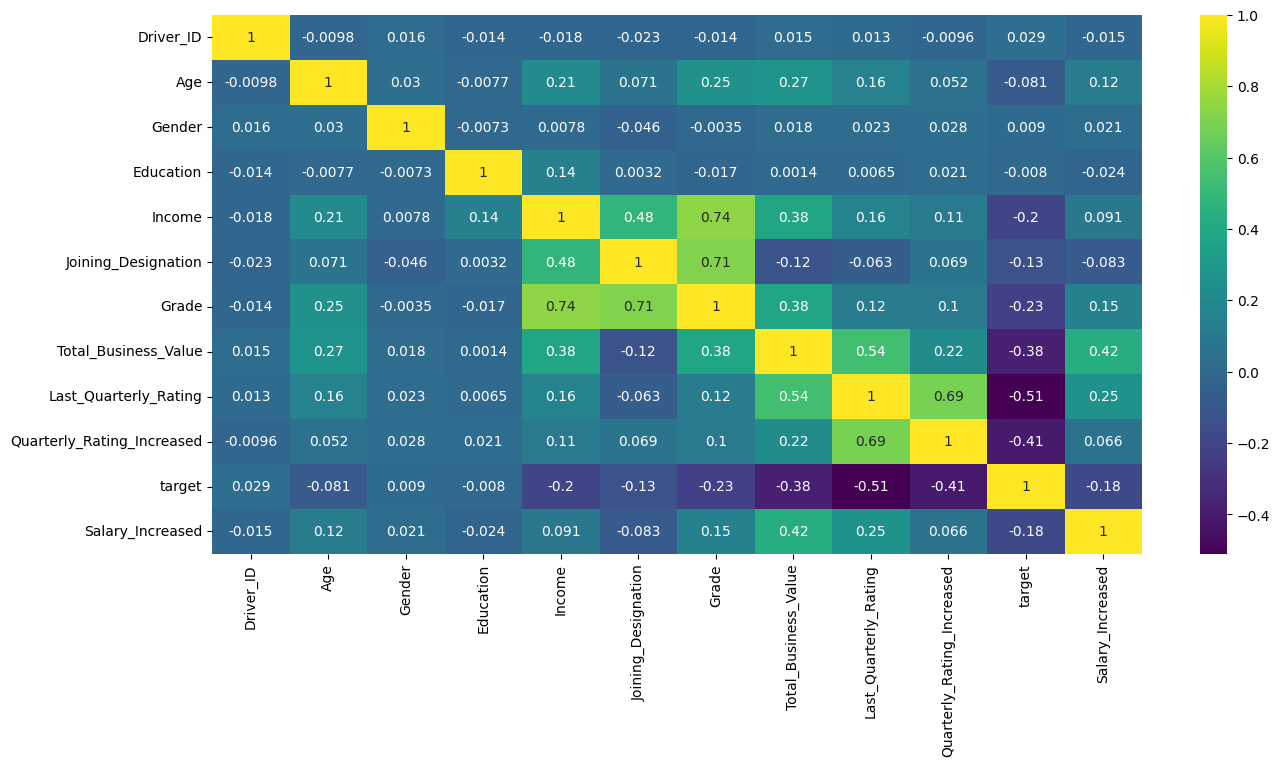

In [59]:
plt.figure(figsize=(15, 7))

sns.heatmap(final_data.corr(method="pearson"), annot=True, cmap="viridis")
plt.show()

* Age is positively correlated with grade, total business value, and last quarterly rating. This means that older drivers tend to have higher grades, total business value, and last quarterly ratings.
* Gender is positively correlated with joining designation and grade. This means that female drivers are more likely to have higher joining designations and grades.
* Education is positively correlated with income and target. This means that drivers with more education tend to have higher incomes and targets.

## One-Hot Encoding

In [60]:
final_data = pd.concat([final_data, final_data['City']], axis=1)

In [61]:
final_data.shape

(2381, 14)

###Standardization (for training data)

In [63]:
X = final_data.drop(["Driver_ID", "target", "City"], axis = 1)
X_cols = X.columns
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [64]:
X = pd.DataFrame(X)

X.columns = X_cols

X

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Salary_Increased
0,0.189189,0.0,1.0,0.262508,0.00,0.00,0.032064,0.333333,0.0,0.0
1,0.270270,0.0,1.0,0.316703,0.25,0.25,0.014326,0.000000,0.0,0.0
2,0.594595,0.0,1.0,0.308750,0.25,0.25,0.017944,0.000000,0.0,0.0
3,0.216216,0.0,0.0,0.200489,0.00,0.00,0.015570,0.000000,0.0,0.0
4,0.270270,1.0,0.5,0.382623,0.50,0.50,0.027405,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2376,0.351351,0.0,0.0,0.405626,0.25,0.50,0.239197,1.000000,1.0,0.0
2377,0.351351,1.0,0.0,0.007643,0.00,0.00,0.014326,0.000000,0.0,0.0
2378,0.648649,0.0,0.0,0.138588,0.25,0.25,0.043432,0.000000,0.0,0.0
2379,0.189189,1.0,1.0,0.330673,0.00,0.00,0.024436,0.000000,0.0,0.0


#### Train & Test Split

In [65]:
y = final_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

In [66]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 10)
X_test Shape:  (477, 10)
y_train Shape:  (1904,)
y_test Shape:  (477,)


## Random Forest Classifier - Before Balancing

In [67]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 4, 'n_estimators': 150}
Best Score:  0.8626770412583342

Elapsed Time:  12.341840028762817


              precision    recall  f1-score   support

           0       0.70      0.57      0.63       148
           1       0.82      0.89      0.86       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.79      0.79      0.79       477



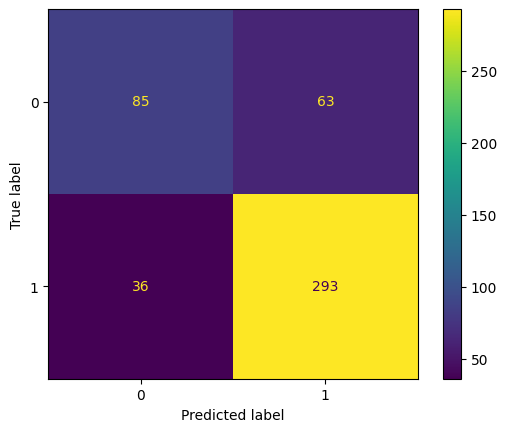

In [68]:
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

**Random Forest Classifier with balanced class weight**


*   Out of all prediction, the measure for correctly predicted 0 is 73% and for 1 is 82% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 90% (Recall)




**As this is imbalanced dataset. We give importance to F1-Score metrics**


*  F1 Score of 0 is 64%
*  F1 Score of 1 is 86%



**Lets try out bootstrapped random forest using subsample**

In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       148
           1       0.82      0.89      0.86       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.79      0.79      0.79       477



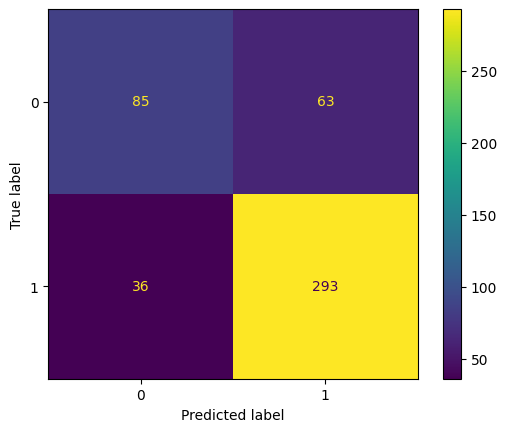

In [69]:
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

**Random Forest Classifier with balanced class weight**


*   Out of all prediction, the measure for correctly predicted 0 is 75% and for 1 is 83% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 91% (Recall)



**As this is imbalanced dataset. We give importance to F1-Score metrics**


*   F1 Score of 0 is 65%
* F1 Score of 1 is 87%




There is not much significant difference in the matrices observed for bootstrapped Random Forest and Weighted Random Forest

Lets try balancing

In [70]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1287
Before OverSampling, counts of label '0': 617 

After OverSampling, the shape of train_X: (2574, 10)
After OverSampling, the shape of train_y: (2574,) 

After OverSampling, counts of label '1': 1287
After OverSampling, counts of label '0': 1287


##Ensemble Learning: Bagging

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 4, 'n_estimators': 200}
Best Score:  0.7824063275073981

Elapsed Time:  15.353673934936523
              precision    recall  f1-score   support

           0       0.74      0.57      0.65       148
           1       0.83      0.91      0.87       329

    accuracy                           0.81       477
   macro avg       0.78      0.74      0.76       477
weighted avg       0.80      0.81      0.80       477



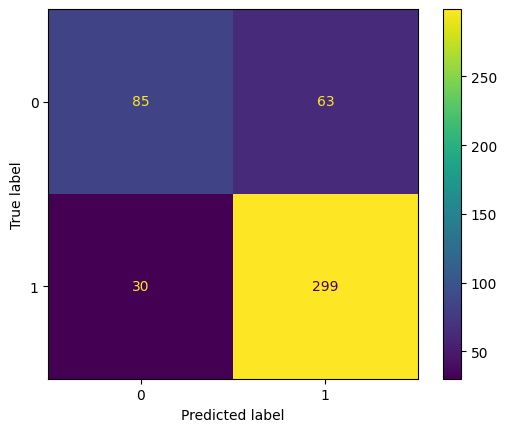

In [71]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

**Random Forest Classifier with balanced class weight**


*   Out of all prediction, the measure for correctly predicted 0 is 74% and for 1 is 83% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 91% (Recall)
**As this is imbalanced dataset. We give importance to F1-Score metrics**


*  F1 Score of 0 is 65%
*  F1 Score of 1 is 87%






## ROC-AUC Curve

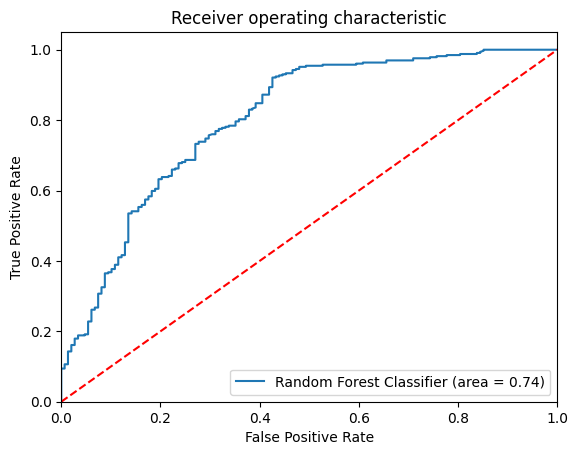

In [72]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

*  The ROC curve in the image shows that the random forest classifier has an area under the curve (AUC) of 0.74. This means that the model is able to correctly distinguish between positive and negative cases 74% of the time, on average.

## Ensemble Learning: Boosting

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Params:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best Score:  0.816331911693752

Elapsed Time:  40.50013613700867
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       148
           1       0.82      0.84      0.83       329

    accuracy                           0.76       477
   macro avg       0.72      0.71      0.71       477
weighted avg       0.76      0.76      0.76       477



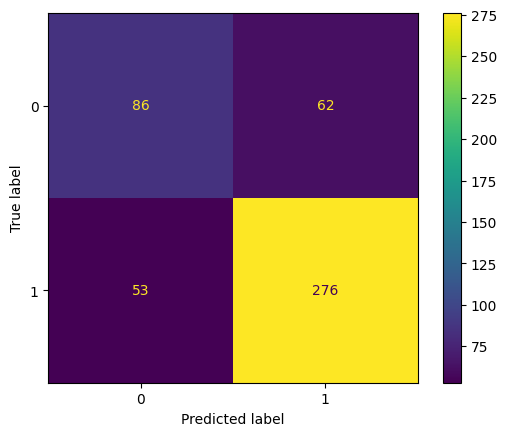

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
    # Additional boosting-specific parameters can be added here
    "learning_rate": [0.01, 0.1, 0.2]
}

start_time = time.time()
gradient_boosting = GradientBoostingClassifier()
c = GridSearchCV(estimator=gradient_boosting, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()


* The model correctly classified 86 instances of class 0 and 276 instances of class 1.
* It incorrectly classified 62 instances of class 0 as class 1 (false positives) and 53 instances of class 1 as class 0 (false negatives).
* Best Parameters: The best hyperparameter configuration found through cross-validation is {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}.
* Best Score: The model achieved a best score of 0.8163 (presumably a metric like accuracy or AUC-ROC, but please clarify if it's different).
* Elapsed Time: The fitting process took 40.5 seconds.
* Accuracy: The overall model accuracy is 0.76.
* Precision and Recall:
* For class 0, precision is 0.62 and recall is 0.58.
*For class 1, precision is 0.82 and recall is 0.84.
* F1-Score:
The average F1-score across classes is 0.71.


#**Actionable Insights & Recommendations**

* The ROC curve in the image shows that the random forest classifier has an area under the curve (AUC) of 0.74. This means that the model is able to correctly distinguish between positive and negative cases 74% of the time, on average.



* We need to incentivise the drivers overtime or other perks to overcome churning
* Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.
* Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
* Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.
* Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.
* Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.
* The employees whose quarterly rating has increased are less likely to leave the organization.
* Company needs to implement the reward system for the customer who provide the feedback and rate drivers
* The employees whose monthly salary has not increased are more likely to leave the organization.
* Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.
Company needs to look why customers are not rating drivers.
* Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators
* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset. More data will overcome this issue.
* The Random Forest Classifier attains the Recall score of 91% for the driver who left the company. Which indicates that model is performing the decent job.

#**Recommendations**

The recommendations are as follows:

* Use a machine learning model that is specifically designed to handle imbalanced data. There are a number of different models that can be used for this purpose, such as SMOTE, ADASYN, and Random Over-Sampling (ROS).
* Use a performance metric that is appropriate for imbalanced data. The accuracy metric is not a good choice for imbalanced data, because it can be misleading. The F1-score is a more appropriate metric for imbalanced data, because it takes into account both precision and recall.
* Use a visualization technique that can help to identify any biases in the data. The ROC curve is a useful visualization technique for this purpose.

In addition to these recommendations, there are a number of other things that the company can do to improve the performance of its churn prediction model. These include:

* Collect more data. The more data the company has, the better it will be able to train its model.
* Improve the quality of the data. The company should make sure that the data it is using is accurate and complete.
* Experiment with different features. The company should experiment with different features to see which ones are most predictive of churn.
* Use a more sophisticated model. The company could use a more sophisticated model, such as a neural network, to improve the performance of its churn prediction model.

By following these recommendations, the company can improve the performance of its churn prediction model and reduce the number of employees who leave the company.